<a href="https://colab.research.google.com/github/Fakahmad/Machine_Learning/blob/main/Income_inequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Income Inequality**

Income inequality is a growing problem in almost all the nations across the world.
It is also one of the goals of United Nations to reduce it, ref SGD10:Reduce inequality within and among countries    https://www.un.org/sustainabledevelopment/inequality/
Accurate data and analysis is the key to solving such socio-econimic problems.

The dataset given for this problem at hand is from US. Based on various studies carried out in US and around the world, it has been established that poverty and income equality is depended mainly on education, race and employement status and gender. The given database will be analysed and used keeping this information in mind.

The target feature is income_above_limit which is a binary-class variable.
The objective of this task is to create a machine learning model to predict whether an individual will earn above or below a certain threshold. The metric for evaluation will be f1-score.




The overall approach taken is as follows

1.   To study, explore and visualize the dataset
2.   Carry out data cleaning and wrangling
3.   Model, test and baseline result of ML models
4.   Evaluate different models and select the best
5.   Deploy and make predictions on new data


In [4]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Set the path to the dataset on Google Drive
file_path = '/content/drive/Othercomputers/My Laptop/Google Drive/Datasets/Income_inequality/data.csv'

In [7]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

In [8]:
original_df = df # storing in a variable for any further use later on

In [9]:
# print few rows to ensure its uploaded correctly
print(df.head())

          ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate                  NaN   
1  ID_TZ0001   65   Female    High school graduate                  NaN   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children                  NaN   
4  ID_TZ0004   70     Male    High school graduate                  NaN   

  education_institute                    marital_status  \
0                 NaN                           Widowed   
1                 NaN                           Widowed   
2                 NaN                     Never married   
3                 NaN                     Never married   
4                 NaN   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  ...  \
0                       White   All other         Not in labor force  ...   
1                       White   All othe

In [10]:
# showing a random sample of 5 rows
df.sample(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
142750,ID_TZ39319,23,Female,Some college but no degree,NaN,NaN,Never married,Amer Indian Aleut or Eskimo,All other,Children or Armed Forces,...,US,Not identifiable,No,Different county same state,Different county same state,No,West,Abroad,368.76,Below limit
123186,ID_TZ21533,43,Female,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2813.77,Below limit
68466,ID_TZ16078,20,Female,High school graduate,Private,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1952.40,Below limit
57170,ID_TZ150602,32,Female,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,101.01,Below limit
206946,ID_TZ97679,7,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,3697.22,Below limit


In [11]:
# Right away we can see that many columns have missing values and ' ?'

**Basic Data Exploration**

Checking the shape of the data

Checking the columns of the data

Checking the datatypes

Looking for missing values

Putting it all together

Looking for duplicates

Statistical description of the data

In [12]:
# checking basic shape of the dataframe
df.shape

(209499, 43)

In [13]:
# displaying names and datatypes of all columns
df.dtypes

ID                                 object
age                                 int64
gender                             object
education                          object
class                              object
education_institute                object
marital_status                     object
race                               object
is_hispanic                        object
employment_commitment              object
unemployment_reason                object
employment_stat                     int64
wage_per_hour                       int64
is_labor_union                     object
working_week_per_year               int64
industry_code                       int64
industry_code_main                 object
occupation_code                     int64
occupation_code_main               object
total_employed                      int64
household_stat                     object
household_summary                  object
under_18_family                    object
veterans_admin_questionnaire      

In [14]:
# So there are lot of object data types, which we will explore further to see if they are
# just text or categorical variables and then decide how to handle and use each one of them

In [15]:
# Next we will use info() function to display all the above and some additional information together
# in one display
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wa

In [16]:
# The dataset has 209499 rows, 43 columns, with 14 null columns. 30 object columns, 0 boolen.
# 1 float and 12 integer columns. Size in the momory is 68.7MB

In [17]:
df.describe(include="all")

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
count,209499,209499.000000,209499,209499,104254,13302,209499,209499,209499,209499,...,209499,207911,121047,207911,207911,103215,16351,16351,209499.000000,209499
unique,209499,NaN,2,17,8,2,7,5,10,8,...,43,9,3,9,8,2,5,50,NaN,2
top,ID_TZ99999,NaN,Female,High school graduate,Private,High school,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,Same,South,California,NaN,Below limit
freq,1,NaN,108784,50627,75617,7247,90723,175709,180404,129789,...,168233,104696,104696,104696,104696,86864,5056,1849,NaN,196501
mean,NaN,34.518728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1740.888324,NaN
std,NaN,22.306738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995.559557,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.870000,NaN
25%,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1061.290000,NaN
50%,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1617.040000,NaN
75%,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.480000,NaN


In [18]:
# Based on the info() and describe() functions and initial observation, we can say that
# there are many columns with large degree of missing data.
# Some variables have very large STD and other statistical measures, which means that data in those
# columns will need to be handled in different ways after more analysis.
# Some categorical variables also have many overlapping values, like education, which we will
# need to combine and handle later. The target variable is very imbalanced, so we will need to employ
# techniques to ensure that this imbalance does not negatively affect the final model training.

**Analysis using Data Visualization**



In [19]:
plt.ioff() # disabling interactive mode, as some graphs were shaking

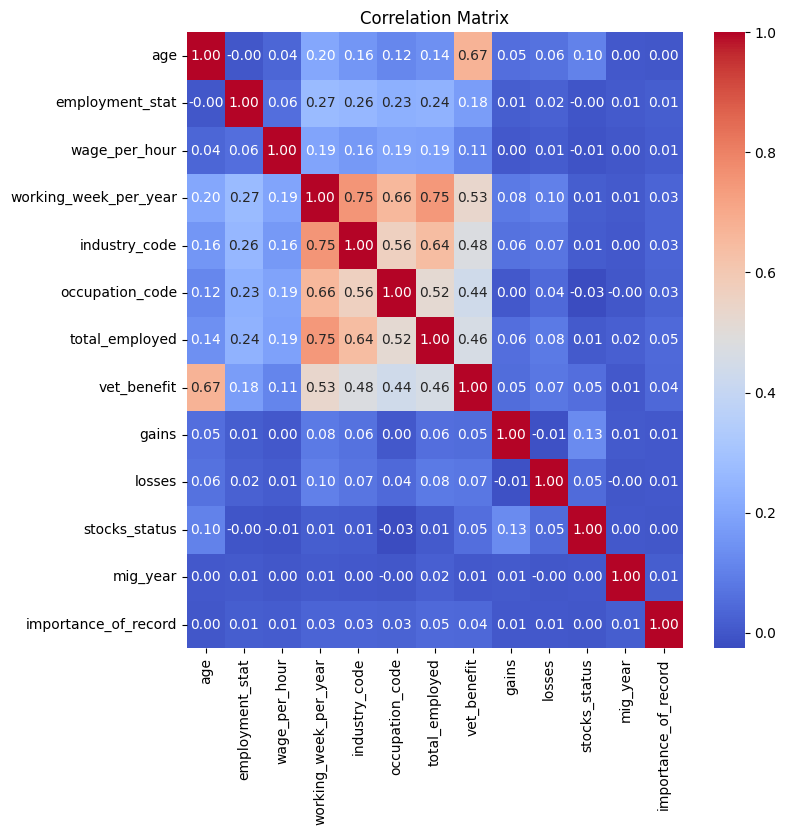

In [20]:
# Visualize the correlation matrix before doing any other analysis
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [21]:
# The target variable, 'income_above_limit', and hence not included in above heatmap.
# It has only 2 values, therefore I will convert values in this column to 0 and 1 so that this
# can also be included in the heatmap. 1 for 'Above limit' and 0 for 'Below limit'

df['income_above_limit'] = df['income_above_limit'].replace({'Below limit': 0, 'Above limit': 1})

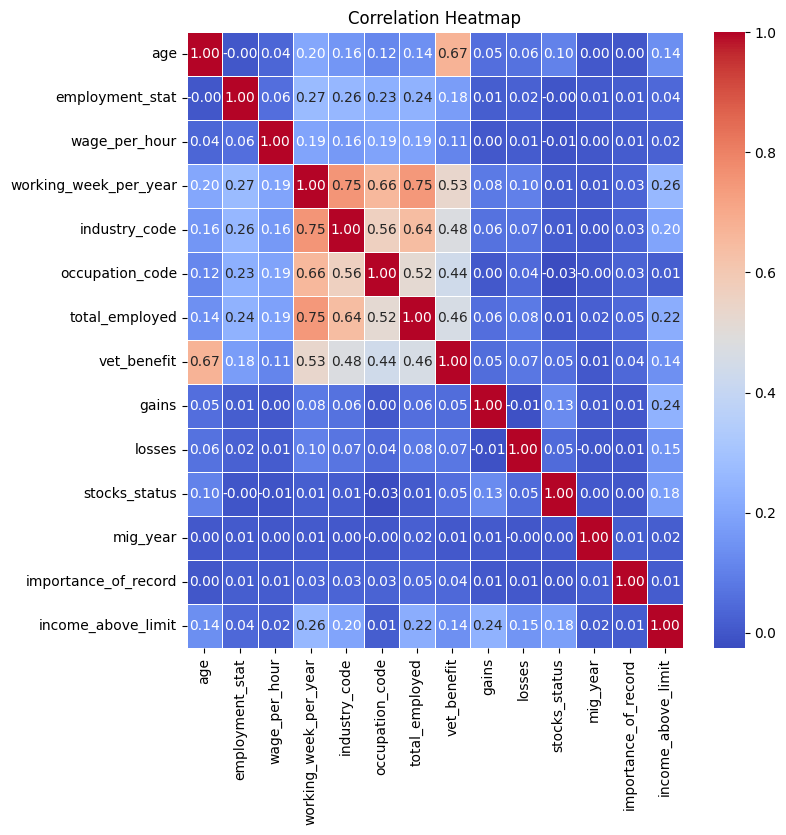

In [22]:
# Calculate the correlation matrix including the target variable
correlation_matrix = df.corr(numeric_only=True)

# Extract the order of columns from the correlation matrix
heatmap_columns = list(correlation_matrix.columns)

# Generate a heatmap
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

**Insights from heatmap**

**Strong Positive Correlations:**
total_employed and industry_code have a strong positive correlation of approximately 0.64. This suggests that these two features are related and may provide redundant information. *industry_code* has better data, so it will be kept and total_employed will be dropped.

**Moderate Positive Correlations:**
vet_benefit and total_employed have a moderate positive correlation of approximately 0.46. Since business usage and understanding of both not fully clear, and also the data quality is not good, so both will be dropped. occupation_code and industry_code have a moderate positive correlation of approximately 0.56. *industry_code* will be kept and occupation_code will be dropped.
vet_benefit and working_week_per_year have a moderate positive correlation of approximately 0.53. *working_week_per_year* has good data so it will be kept and vet_benefit will be dropped

**Strong Negative Correlations:**
No strong negative correlations are observed.

**Correlations with the Target Variable (income_above_limit):**
age, vet_benefit, total_employed, and industry_code have positive correlations with the target variable. employment_stat, gains, importance_of_record, and stocks_status also show positive correlations, but less strong.

Considerations: Features with strong positive correlations may provide redundant information, and we might consider keeping only one of them. Out of the above, *age and industry_code* will be kept and rest dropped.
Features with strong correlations with the target variable (income_above_limit) are likely to be important for prediction.

In [23]:
# Additional Observations: There is some corelation observed with gains, stock_status, and vet_benefits
# but based on excel analysis, the real values i.e. non-zero or any meaningful values are very less in
# these columns. These are looking good for dropping later on.
# Similarly mig_year also, with no correlation to anything.
# Follwing columns have good data and have correlation to target as well: age and working_week_per_year

In [24]:
# Next I will create some vizualizations with those variables which are universally considered to
# have impact on income. Uni and bi-variate analysis with target variable will be done to see their
# behaviour and impact

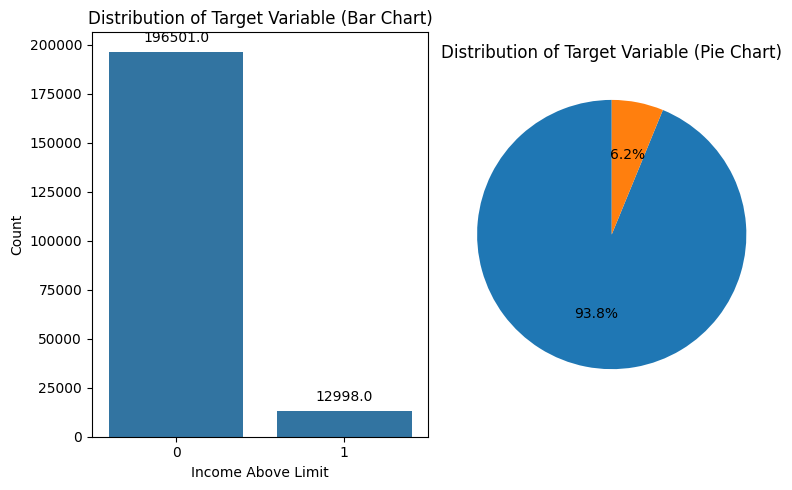

In [25]:
# First, display bar-chart and pie chart for target variable income_above_limit
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Display the distribution in a bar chart with counts
sns.countplot(x='income_above_limit', data=df, ax=axes[0])
axes[0].set_title('Distribution of Target Variable (Bar Chart)')
axes[0].set_xlabel('Income Above Limit')
axes[0].set_ylabel('Count')

# Annotate the count on top of each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the distribution in a pie chart
df['income_above_limit'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, startangle=90, ax=axes[1])
axes[1].set_title('Distribution of Target Variable (Pie Chart)')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
# The target variable is highly imbalanced, we should consider techniques like SMOTE later on

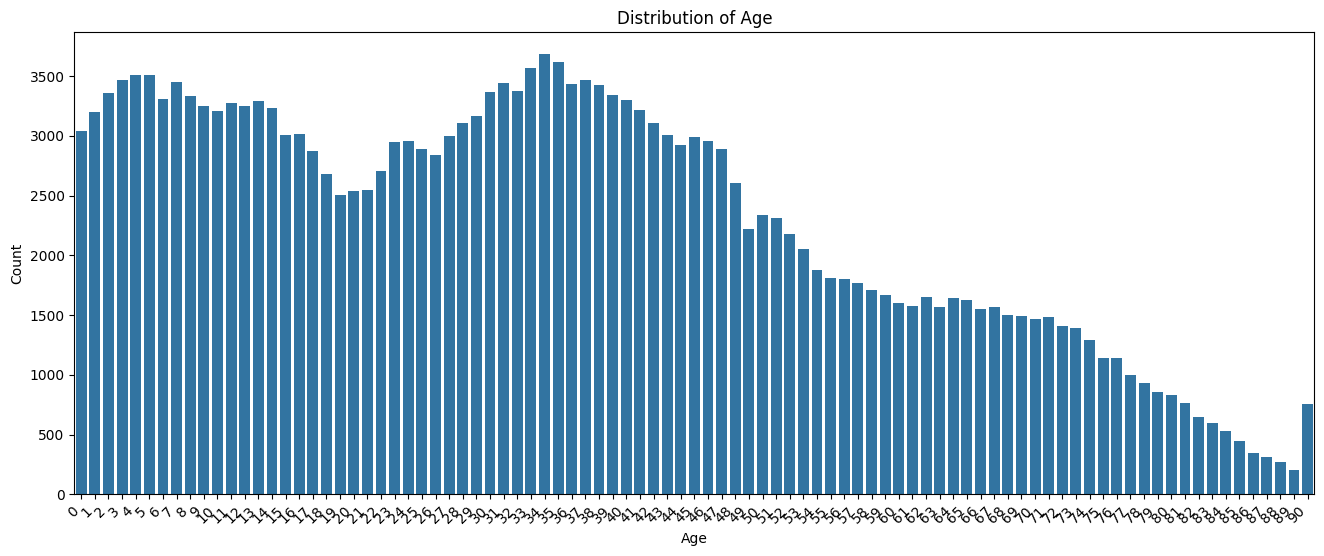

In [27]:
# Create a countplot for 'age'
plt.figure(figsize=(16, 6))
sns.countplot(x='age', data=df, order=sorted(df['age'].unique()))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
# large number of rows with ages less than the minimum working age of 18. And surprisingly,
# many values for age 90 as well! A quick review of excel shows that values for age 90 are 3 times
# the number of people in ages 89, 88 and 87. My understanding from this is that all those
# 90 and above have been included in age 90.

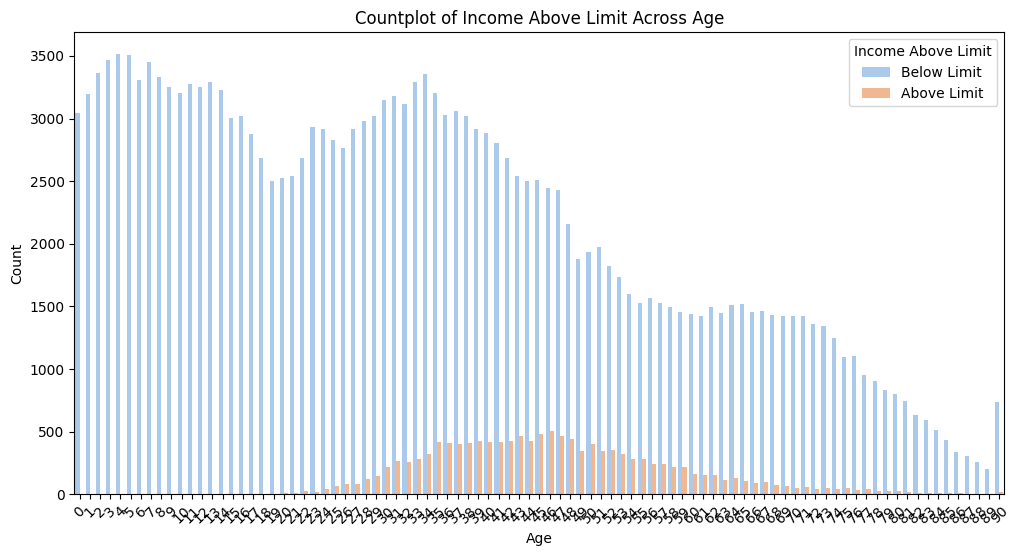

In [29]:
# Create a countplot of 'income_above_limit' across 'age'
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='income_above_limit', data=df, palette='pastel')
plt.title('Countplot of Income Above Limit Across Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Income Above Limit', labels=['Below Limit', 'Above Limit'])
plt.xticks(rotation=45)
plt.show()

In [30]:
# As expected, most values of above income are in the middle years.
# Uptil age 18, almost everyone is below income level, which makes sense becuase those classified as children
# are not legally allowed to work. Therefore, all rows with ages <= 18 can be safely removed later on

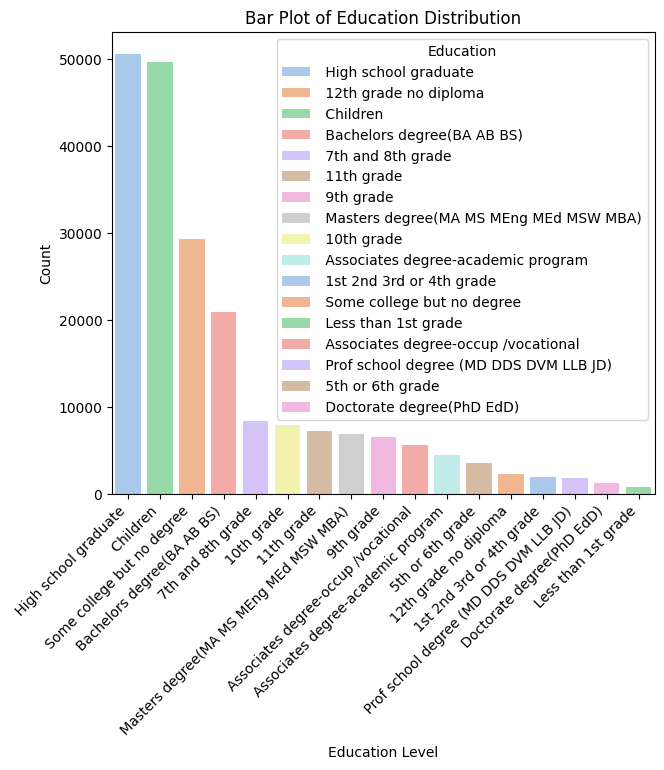

In [31]:
# Create a bar plot for 'education'
plt.figure(figsize=(7, 6))
sns.countplot(x='education', data=df, palette='pastel', order=df['education'].value_counts().index, hue='education')
plt.title('Bar Plot of Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education', labels=df['education'].unique(), loc='upper right')
plt.show()

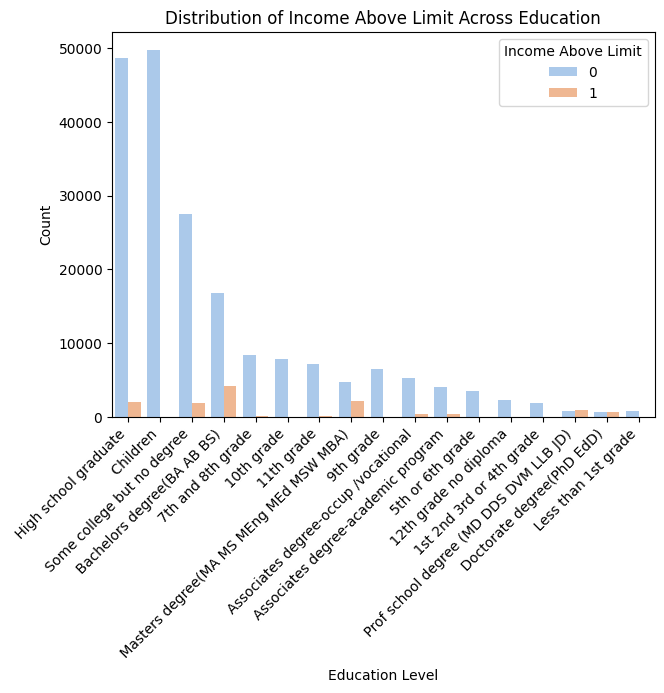

In [32]:
# Create a countplot for 'income_above_limit' across 'education'
plt.figure(figsize=(7, 5))
sns.countplot(x='education', hue='income_above_limit', data=df, palette='pastel', order=df['education'].value_counts().index)
plt.title('Distribution of Income Above Limit Across Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Income Above Limit', labels=df['income_above_limit'].unique())
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
# As expected, people with more education have higher levels of income.
# Another observation is that there is need to combine and reduce the values in education,
# as many of them look similar and overlap also. This will be done in later steps

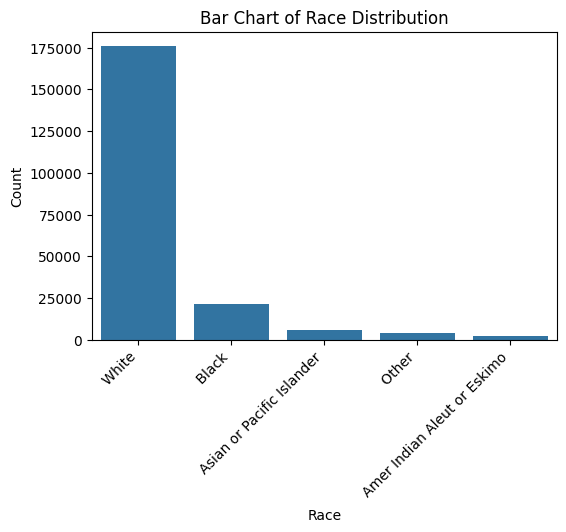

In [34]:
# Create a bar chart for 'race'
plt.figure(figsize=(6, 4))
sns.countplot(x='race', data=df, order=df['race'].value_counts().index)
plt.title('Bar Chart of Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

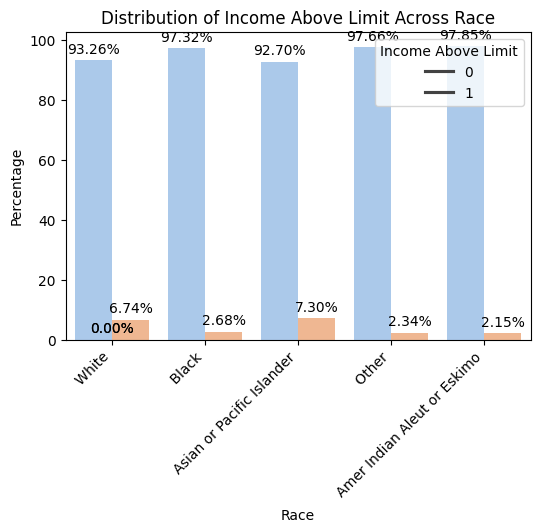

In [35]:
# Calculate and percentage of 'income_above_limit' for each 'race' type
percentage_df = df.groupby(['race', 'income_above_limit']).size() / df.groupby('race').size() * 100
percentage_df = percentage_df.reset_index(name='Percentage')

# Create a countplot for 'income_above_limit' across 'race'
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='race', y='Percentage', hue='income_above_limit', data=percentage_df, palette='pastel', order=df['race'].value_counts().index)
plt.title('Distribution of Income Above Limit Across Race')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Annotate percentages above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

plt.legend(title='Income Above Limit', labels=df['income_above_limit'].unique())
plt.show()

In [36]:
# In the above graph I have chosen to show %ages instead of numbers.
# The result is as expected, Asians and white Americans are the most educated and well paid
# in USA.

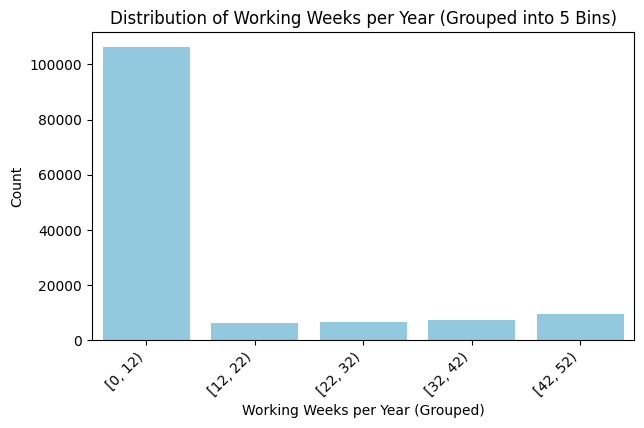

In [37]:
# Create a countplot for 'working_week_per_year' with custom bins
custom_bins = [0, 12, 22, 32, 42, 52]

plt.figure(figsize=(7, 4))
sns.countplot(x=pd.cut(df['working_week_per_year'], bins=custom_bins, include_lowest=True, right=False), data=df, color='skyblue')
plt.title('Distribution of Working Weeks per Year (Grouped into 5 Bins)')
plt.xlabel('Working Weeks per Year (Grouped)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

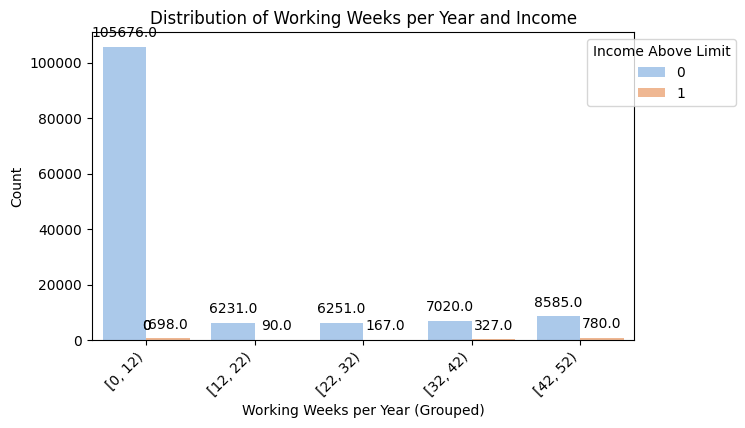

In [38]:
# Create a countplot for 'working_week_per_year' with custom bins and include 'income_above_limit'
custom_bins = [0, 12, 22, 32, 42, 52]

plt.figure(figsize=(7, 4))
ax = sns.countplot(x=pd.cut(df['working_week_per_year'], bins=custom_bins, include_lowest=True, right=False),
                   hue='income_above_limit', data=df, palette='pastel', dodge=True)

plt.title('Distribution of Working Weeks per Year and Income')
plt.xlabel('Working Weeks per Year (Grouped)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Above Limit', loc='upper right', bbox_to_anchor=(1.2, 1))

# Display numbers on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [39]:
# The above graph doesnt show the effect very well and due to custom bins, the count of
# Above limit also doesn't appear to be correct. Therefore I will use the violin plot below to
# show it differently

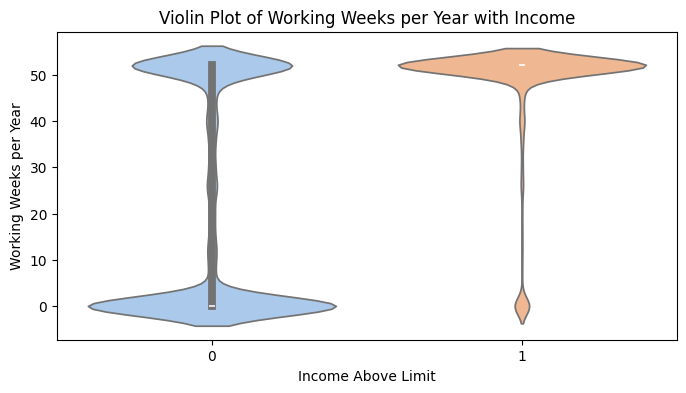

In [40]:
# Create a violin plot for 'working_week_per_year' with 'income_above_limit'
plt.figure(figsize=(8, 4))
sns.violinplot(x='income_above_limit', y='working_week_per_year', hue='income_above_limit', data=df, palette='pastel', legend=False)
plt.title('Violin Plot of Working Weeks per Year with Income')
plt.xlabel('Income Above Limit')
plt.ylabel('Working Weeks per Year')
plt.show()

In [41]:
# The aove graphs tell us clearly one of the main reason for imbalnce in target variable
# and why so many values are 'Below limit'. Majority of people in this dataset have worked
# less than 10 weeks in a year. Those who worked more weeks, earned Above limit income.

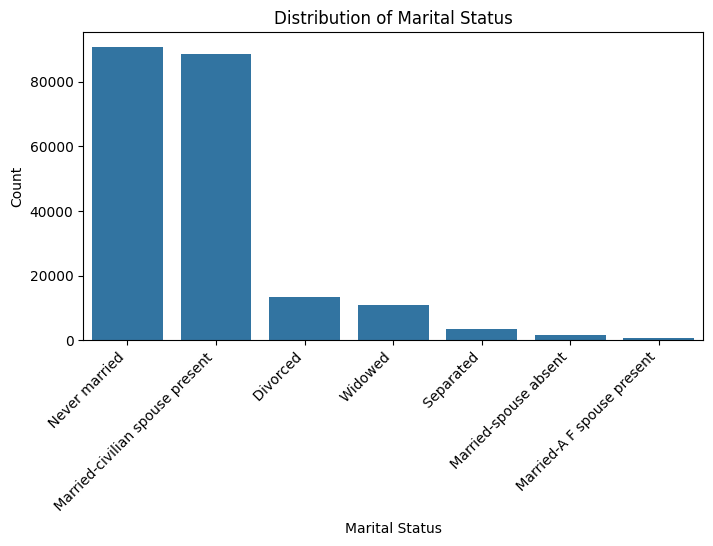

In [42]:
# Create a countplot for 'marital_status'
plt.figure(figsize=(8, 4))
sns.countplot(x='marital_status', data=df, order=df['marital_status'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
# Some of the values will be combined later as they overlap each other.

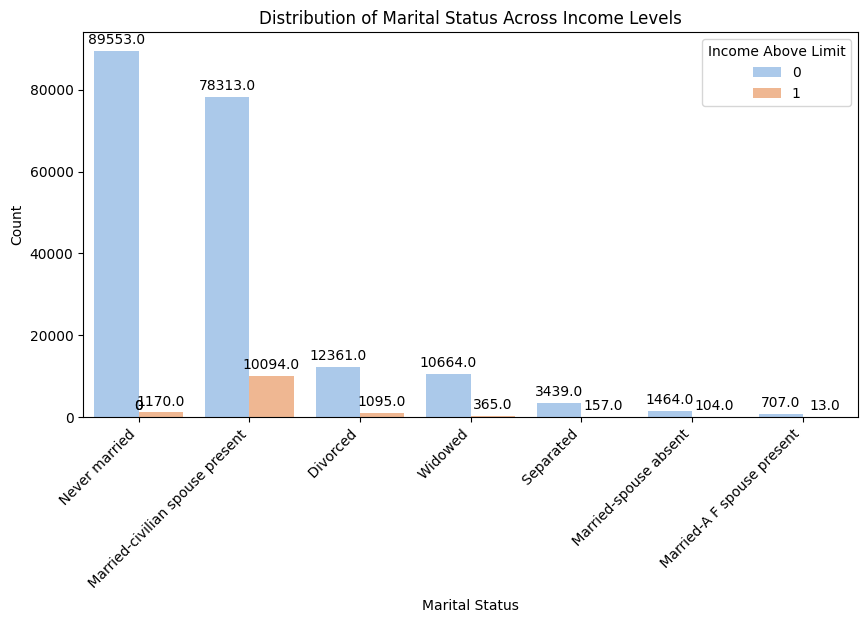

In [44]:
# Create a countplot for 'marital_status' with hue='income_above_limit'
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='marital_status', hue='income_above_limit', data=df, palette='pastel', order=df['marital_status'].value_counts().index)
plt.title('Distribution of Marital Status Across Income Levels')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Above Limit', labels=df['income_above_limit'].unique())

# Annotate counts above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

plt.show()

In [45]:
# Married people earn more!!! Ok fine

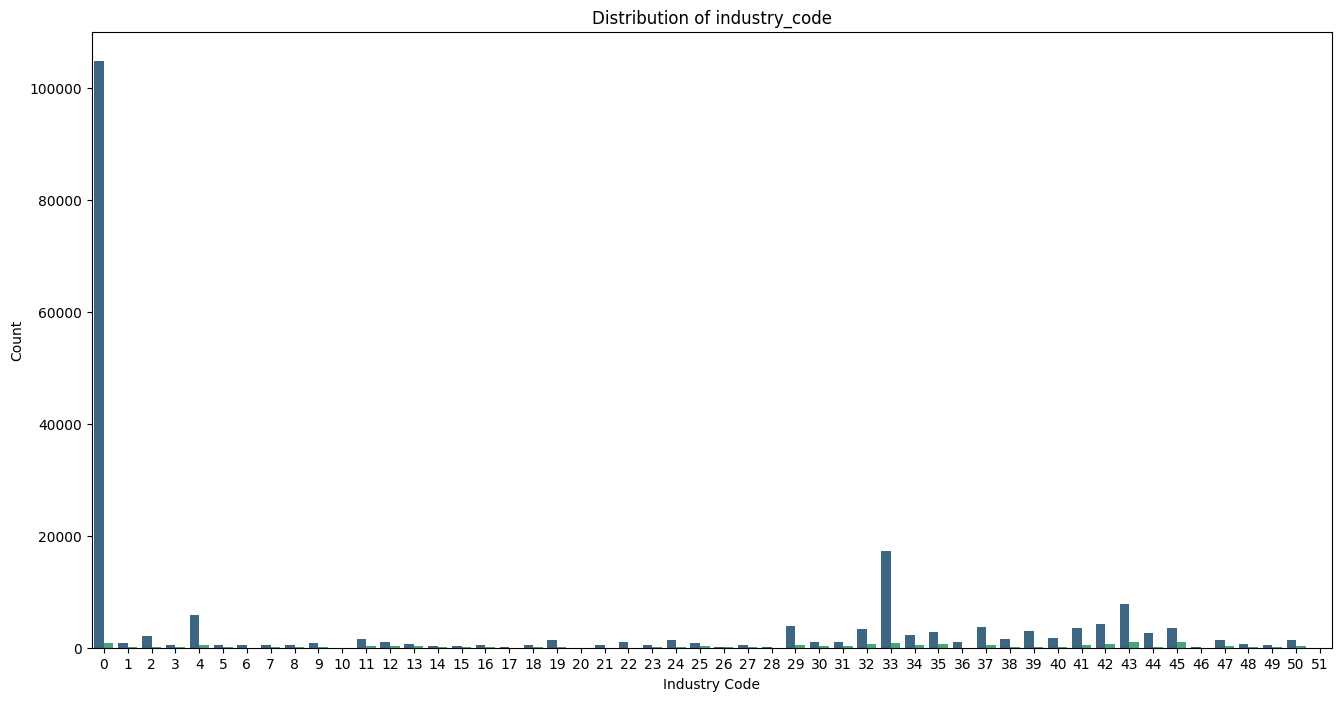

In [46]:
# Create a countplot for 'industry_code'
plt.figure(figsize=(16, 8))
sns.countplot(x='industry_code', data=df, palette='viridis', hue='income_above_limit', legend=False)
plt.title('Distribution of industry_code')
plt.xlabel('Industry Code')
plt.ylabel('Count')
plt.show()

In [47]:
# Tall skyscrapper with value with 0 are children. These values will be dropped from dataset later

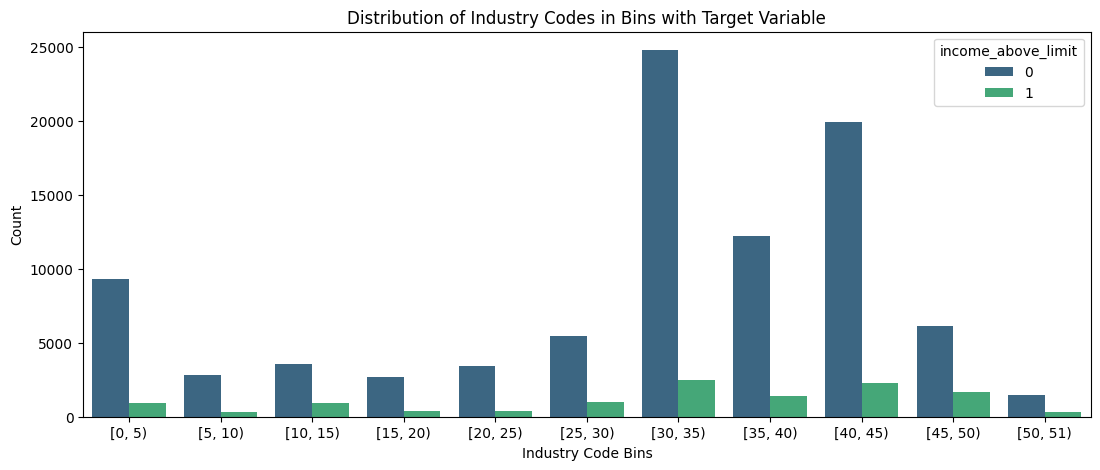

In [48]:
# industry_code is bunched in 10 bins shown across income in the graph below.
# 0 code for children is excluded

# Exclude industry_code of 0
filtered_df = df[df['industry_code'] != 0].copy()

# Define bin edges
bin_edges = list(range(0, 52, 5)) + [51]

# Create a new column 'industry_code_bin' based on bin edges
filtered_df.loc[:, 'industry_code_bin'] = pd.cut(filtered_df['industry_code'], bins=bin_edges, right=False)

# Create a count plot for 'industry_code_bin' with hue='income_above_limit'
plt.figure(figsize=(13, 5))
sns.countplot(x='industry_code_bin', data=filtered_df, hue='income_above_limit', palette='viridis')
plt.title('Distribution of Industry Codes in Bins with Target Variable')
plt.xlabel('Industry Code Bins')
plt.ylabel('Count')
plt.show()


In [49]:
# The above indicates that working in certain industries is financially more beneficial
# than others, which is understandable. There is no column to indicate the strength or value
# particular industry codes, so these are just numbers with correlation to income

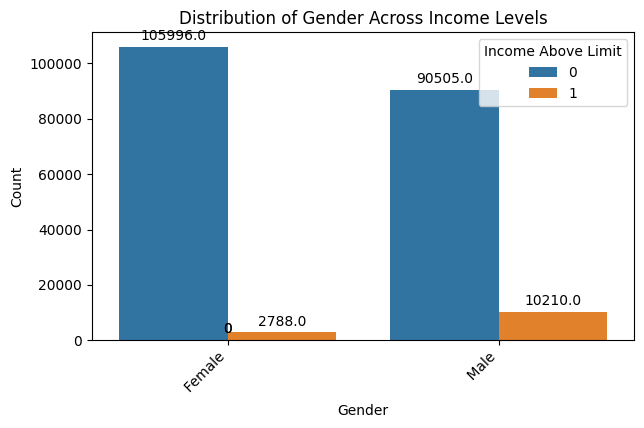

In [50]:
# Create a countplot for 'gender' with hue='income_above_limit' and count annotations
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='gender', hue='income_above_limit', data=df, order=df['gender'].value_counts().index)

# Annotate counts above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Gender Across Income Levels')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Above Limit', labels=df['income_above_limit'].unique())
plt.show()

In [51]:
# As all around the world, the above data shows large bias towards men. Which is
# unfortunate. Such insights can be used to take steps for gender parity in income

**Data cleaning and wrangling**

The steps will be to
1. replace ' ?' (space and ?) with Naan
2. determine again those columns with high null values and decide to drop or keep them
3. determine rows with multiple null values or other values which can create bias and imbalance in the data and decide to remove or keep them
4. determine outliers and decide to remove them

In [52]:
df_with_questionmarks = df #I will be frequently saving df in another variable for future use

In [53]:
print(df.shape) #to ensure complete data is available, nothing lost so far

(209499, 43)


In [54]:
# Count the occurrences of '?' in each column
question_mark_count_before = (df == ' ?').sum()

# Display the count of '?' in each column
print("Count of '?' in each column before replacement:")
print(question_mark_count_before)

Count of '?' in each column before replacement:
ID                                     0
age                                    0
gender                                 0
education                              0
class                                  0
education_institute                    0
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason                    0
employment_stat                        0
wage_per_hour                          0
is_labor_union                         0
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main                   0
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                        0
veterans_

In [55]:
# Store the number of missing values in each column before replacement
missing_values_before = df.isnull().sum()

# Replace ' ?' with NaN in the entire DataFrame
df.replace(' ?', np.nan, inplace=True)

# Calculate the number of missing values in each column after replacement
missing_values_after = df.isnull().sum()

# Calculate the difference in missing values
missing_values_difference = missing_values_after - missing_values_before

# Create a DataFrame to display the results
missing_values_table = pd.DataFrame({
    'Column': missing_values_before.index,
    'Missing Before': missing_values_before.values,
    'Missing After': missing_values_after.values,
    'Difference': missing_values_difference.values
})

# Display the missing values table
print(missing_values_table)

                            Column  Missing Before  Missing After  Difference
0                               ID               0              0           0
1                              age               0              0           0
2                           gender               0              0           0
3                        education               0              0           0
4                            class          105245         105245           0
5              education_institute          196197         196197           0
6                   marital_status               0              0           0
7                             race               0              0           0
8                      is_hispanic               0              0           0
9            employment_commitment               0              0           0
10             unemployment_reason          202979         202979           0
11                 employment_stat               0              

In [56]:
df_without_questionmarks = df.copy(deep=True)

In [57]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [59]:
df.describe(include="all")

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
count,209499,209499.000000,209499,209499,104254,13302,209499,209499,209499,209499,...,202983,103215,16351,103215,103215,103215,16351,15610,209499.000000,209499.000000
unique,209499,NaN,2,17,8,2,7,5,10,8,...,42,8,2,8,7,2,5,49,NaN,NaN
top,ID_TZ99999,NaN,Female,High school graduate,Private,High school,Never married,White,All other,Children or Armed Forces,...,US,unchanged,No,unchanged,unchanged,Same,South,California,NaN,NaN
freq,1,NaN,108784,50627,75617,7247,90723,175709,180404,129789,...,168233,86864,10298,86864,86864,86864,5056,1849,NaN,NaN
mean,NaN,34.518728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1740.888324,0.062043
std,NaN,22.306738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995.559557,0.241235
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.870000,0.000000
25%,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1061.290000,0.000000
50%,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1617.040000,0.000000
75%,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.480000,0.000000


In [ ]:
# By this point, based on the different methods of analysis like EDA, statistical and numerical analysis,
# visualization, heatmap, Excel based analysis of data, prior knowledge of income and poverty
# and the factors affecting it, I have a formed an opinion about which columns are most relevant
# and should be included and which should be dropped.
# However, before finalising, I will do one more analysis to find out importance score
# of features. This I will do by training a random forest model and finding out the score of each
# feature. This is an interim step and not part of base modeling, which I will do later.
# This step will be done in a function to keep it seperate from other processing

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import label_binarize

def feature_importance_scores_with_metrics(df):
    # Check if 'income_above_limit' column exists in the DataFrame
    if 'income_above_limit' not in df.columns:
        raise KeyError("'income_above_limit' column not found in the DataFrame")

    # Drop 'ID' column if it exists
    if 'ID' in df.columns:
        df.drop(columns=['ID'], inplace=True)

    # Separate features (X) and target variable (y)
    X = df.drop(columns=['income_above_limit'])
    y = df['income_above_limit']

    # One-hot encode categorical variables
    X = pd.get_dummies(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest classifier
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    # Get feature importances
    feature_importances = clf.feature_importances_

    # Create a DataFrame with feature names and their importance scores
    feature_importance_scores_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })

    # Extract the original feature names from the one-hot encoded columns
    original_features = X.columns.str.split('_').str[0].unique()

    # Sum up the importance scores for each original feature
    summary_df = pd.DataFrame({
        'Feature': original_features,
        'Importance': 0.0
    })

    for feature in original_features:
        relevant_columns = [col for col in feature_importance_scores_df['Feature'] if col.startswith(feature)]
        summary_df.loc[summary_df['Feature'] == feature, 'Importance'] = feature_importance_scores_df.loc[
            feature_importance_scores_df['Feature'].isin(relevant_columns), 'Importance'].sum()

    # Sort the DataFrame by importance scores in descending order
    summary_df = summary_df.sort_values(by='Importance', ascending=False)

    # Predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Convert string labels to numerical format
    y_test_numeric = label_binarize(y_test, classes=['Below limit', 'Above limit'])
    y_pred_numeric = label_binarize(y_pred, classes=['Below limit', 'Above limit'])

    # Calculate F1 Score
    f1 = f1_score(y_test_numeric, y_pred_numeric, average='weighted')

    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print a user-friendly summary of each feature and its total importance score
    print("Feature Importance Scores Summary:")
    print(summary_df[['Feature', 'Importance']])

    # Print model evaluation metrics
    print("\nModel Evaluation Metrics:")
    print(f"Model Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    return summary_df

# Call the function with your DataFrame
feature_importance_scores_df = feature_importance_scores_with_metrics(df)


Feature Importance Scores Summary:
         Feature  Importance
5     occupation    0.114391
4       industry    0.107392
14     education    0.087524
0            age    0.078788
12    importance    0.077348
10        stocks    0.073894
8          gains    0.063714
25       country    0.046570
6          total    0.037693
20     household    0.034655
13        gender    0.033572
15         class    0.031049
1     employment    0.030223
3        working    0.027447
11           mig    0.024788
23           tax    0.022190
18            is    0.021424
26     migration    0.020677
9         losses    0.020622
16       marital    0.017857
17          race    0.011794
2           wage    0.009304
28           old    0.008285
24   citizenship    0.007533
27     residence    0.005066
7            vet    0.004097
19  unemployment    0.002209
22      veterans    0.001997
21         under    0.000575

Model Evaluation Metrics:
Model Accuracy: 0.9551
F1 Score: 1.0000

Confusion Matrix:
[[38962  

In [62]:
# Based on all the other types of analysis done so far and the feature score from the above model,
# 7 columns appear to have good, valid and relevant data.
# These columns are age, gender, education, occupation_code, maritul_status, race, working_week_per_year.
# Therefore the other 35 columns will be dropped, and we will do the preprocessing on these 7 columns.
# The reasons for dropping these columns are various, for example
# all features above with score < 0.01 dropped, columns with large missing values dropped,
# no business understanding dropped. Some have very little "good" or meaningful data

In [63]:
# List of columns to keep
columns_to_keep = ['age', 'gender', 'education', 'marital_status', 'occupation_code', 'race', 'working_week_per_year', 'income_above_limit']

# Drop columns that are not in the list
df = df[columns_to_keep]

# Display the DataFrame with the selected columns
print(df.head())

   age   gender               education                    marital_status  \
0   79   Female    High school graduate                           Widowed   
1   65   Female    High school graduate                           Widowed   
2   21     Male   12th grade no diploma                     Never married   
3    2   Female                Children                     Never married   
4   70     Male    High school graduate   Married-civilian spouse present   

   occupation_code                        race  working_week_per_year  \
0                0                       White                     52   
1                0                       White                      0   
2               26                       Black                     15   
3                0   Asian or Pacific Islander                      0   
4                0                       White                      0   

   income_above_limit  
0                   0  
1                   0  
2                   0  
3 

In [64]:
df.shape

(209499, 8)

In [65]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
                 age  occupation_code  working_week_per_year  \
count  209499.000000    209499.000000          209499.000000   
mean       34.518728        11.321734              23.158850   
std        22.306738        14.460839              24.397963   
min         0.000000         0.000000               0.000000   
25%        15.000000         0.000000               0.000000   
50%        33.000000         0.000000               8.000000   
75%        50.000000        26.000000              52.000000   
max        90.000000        46.000000              52.000000   

       income_above_limit  
count       209499.000000  
mean             0.062043  
std              0.241235  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              1.000000  


In [66]:
# Checking the categorical columns
df.describe(include=['O']).T

,count,unique,top,freq
gender,209499,2,Female,108784
education,209499,17,High school graduate,50627
marital_status,209499,7,Never married,90723
race,209499,5,White,175709


In [ ]:
# some categirical columns have many unique values, we still need to reduce and combine them

In [67]:
# Check for duplicate rows now after dropping extra columns
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
126046


In [68]:
# There are large number of duplicated rows. We will drop these rows below

In [69]:
# Display a few duplicated rows
duplicated_rows = df[df.duplicated()].head(5)
print("Few duplicated rows:")
print(duplicated_rows)

Few duplicated rows:
     age   gender  education  marital_status  occupation_code    race  \
38    11     Male   Children   Never married                0   White   
70    11     Male   Children   Never married                0   White   
111    7   Female   Children   Never married                0   White   
156    9     Male   Children   Never married                0   White   
159    9     Male   Children   Never married                0   White   

     working_week_per_year  income_above_limit  
38                       0                   0  
70                       0                   0  
111                      0                   0  
156                      0                   0  
159                      0                   0  


In [70]:
df_selected_columns_all_rows = df.copy(deep=True)

In [71]:
df_selected_columns_all_rows.shape

(209499, 8)

In [72]:
# Drop duplicated rows and overwrite the DataFrame
df = df.drop_duplicates()

# Display the shape after dropping duplicates
print("Shape after dropping duplicates:", df.shape)

# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

Shape after dropping duplicates: (83453, 8)

Duplicate Rows:
0


In [73]:
df_selected_columns_no_duplicaterows = df.copy(deep=True)

In [74]:
df.shape

(83453, 8)

In [75]:
rows_with_missing_data_percentage = (df.isnull().any(axis=1).mean() * 100).round(2)

# Display the result
print("Percentage of rows with 1 or more missing values:", rows_with_missing_data_percentage, "%")

Percentage of rows with 1 or more missing values: 0.0 %


In [76]:
# An inspection of age and education shows that for ages <= 18, the education column
# always contains 'Children' and the target variable is always 'Below Limit'. Therefore,
# it is best to remove these rows as they are creating bias and not contributing to the model
# I will display the value of target variable 'income_above_limit' before dropping these rows
# and after dropping them

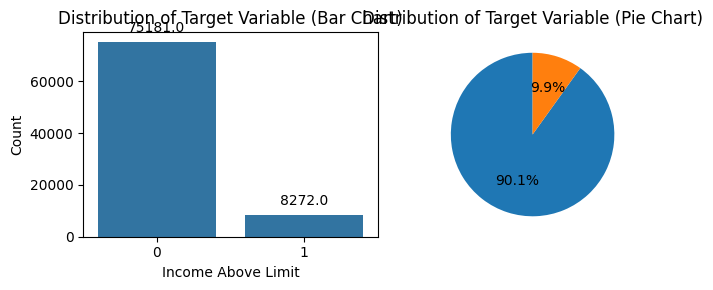

In [77]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Display the distribution in a bar chart with counts
sns.countplot(x='income_above_limit', data=df, ax=axes[0])
axes[0].set_title('Distribution of Target Variable (Bar Chart)')
axes[0].set_xlabel('Income Above Limit')
axes[0].set_ylabel('Count')

# Annotate the count on top of each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the distribution in a pie chart
df['income_above_limit'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, startangle=90, ax=axes[1])
axes[1].set_title('Distribution of Target Variable (Pie Chart)')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [78]:
# after doing the above operation with data, the %age of Above limit has increased from

In [79]:
# Count the number of rows where age is less than or equal to 18
rows_with_age_less_than_18 = len(df[df['age'] <= 18])

# Print the result
print("Number of rows with age <= 18:", rows_with_age_less_than_18)

Number of rows with age <= 18: 3948


In [80]:
df.shape

(83453, 8)

In [81]:
# Drop rows where age is less than or equal to 18 in the original DataFrame
df = df[df['age'] > 18]

print("Shape after dropping rows with age <= 18:", df.shape)

Shape after dropping rows with age <= 18: (79505, 8)


In [82]:
df_selected_columns_no_duplicaterows_adults = df.copy(deep=True)
df_selected_columns_no_duplicaterows_adults.shape

(79505, 8)

In [83]:
# I am assigning df to interim variables because I was getting problems below and I had to bactrack
# number of times, therefore decided to make deep copies before and after each each data
# manipulation step

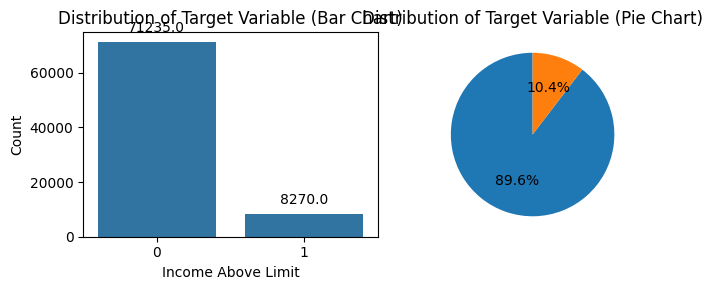

In [84]:
# Set up subplots to show target variable after removing all rows with age <=18
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Display the distribution in a bar chart with counts
sns.countplot(x='income_above_limit', data=df, ax=axes[0])
axes[0].set_title('Distribution of Target Variable (Bar Chart)')
axes[0].set_xlabel('Income Above Limit')
axes[0].set_ylabel('Count')

# Annotate the count on top of each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the distribution in a pie chart
df['income_above_limit'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, startangle=90, ax=axes[1])
axes[1].set_title('Distribution of Target Variable (Pie Chart)')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [85]:
# so after dropping children, the percentage of above limit has increased

In [86]:
# Check for missing values again
missing_values = df.isnull().sum()

# Calculate missing value percentage for each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Create a summary DataFrame
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# Display the missing values summary
print("Missing Values Summary:")
print(missing_info)

Missing Values Summary:
                       Missing Values  Missing Percentage
age                                 0                 0.0
gender                              0                 0.0
education                           0                 0.0
marital_status                      0                 0.0
occupation_code                     0                 0.0
race                                0                 0.0
working_week_per_year               0                 0.0
income_above_limit                  0                 0.0


In [87]:
# so now the df contains no missing values and only 8 columns

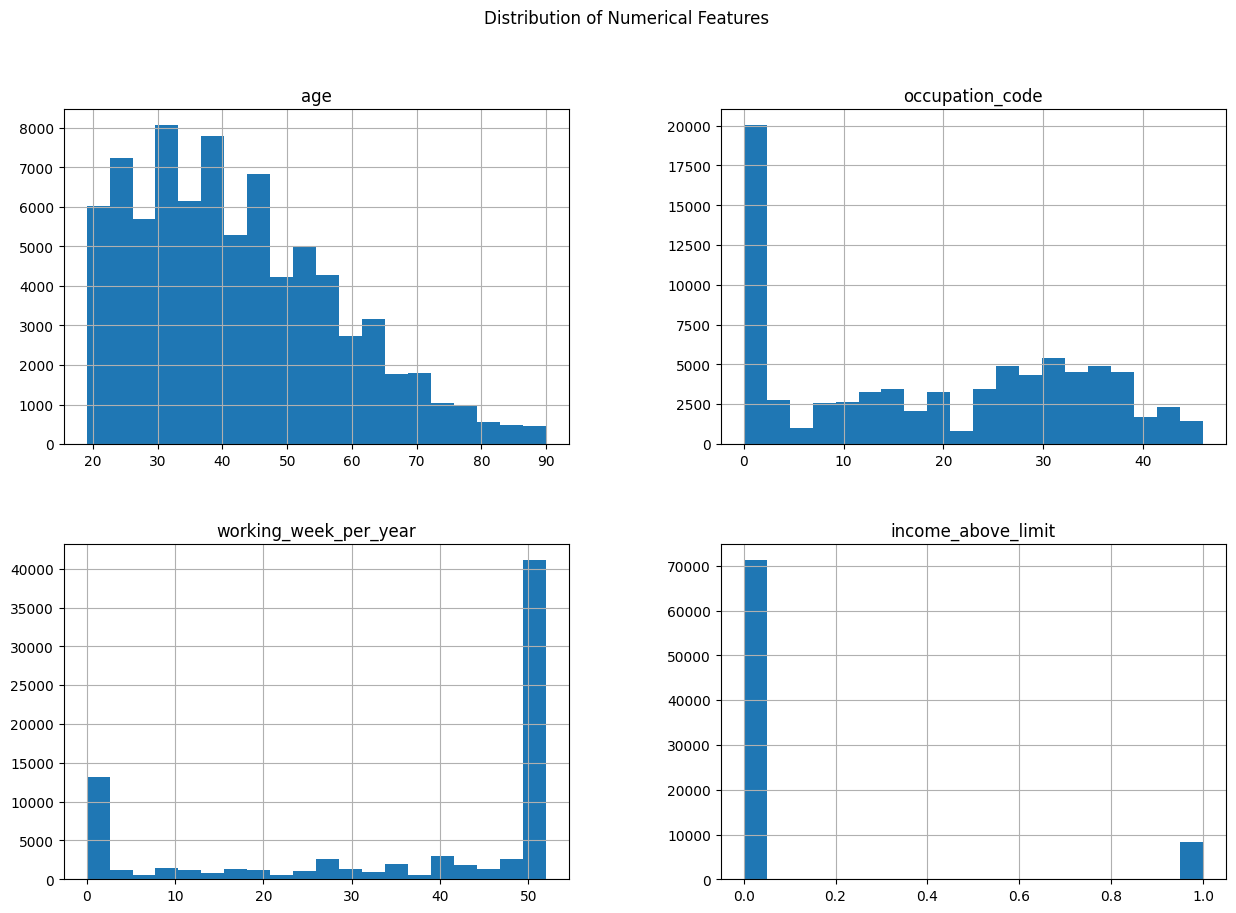

In [88]:
# Visualize the distribution of numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [89]:
# Next step is to combine values in education and marital_status columns, because many are similar
# Race also has 5 values which is fine because they are distinct, so we will leave it as is

In [90]:
# Specify the columns to analyze
columns_to_analyze = ['education', 'marital_status']

# Iterate over columns and display unique values with counts
for column in columns_to_analyze:
    unique_values = df[column].unique()
    unique_values_count = df[column].value_counts()

    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print("\nUnique Values Count:")
    print(unique_values_count)
    print("\n" + "-"*50 + "\n")

Column: education
Unique Values:
[' High school graduate' ' 12th grade no diploma'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 9th grade'
 ' 5th or 6th grade' ' Doctorate degree(PhD EdD)']

Unique Values Count:
 High school graduate                      21611
 Some college but no degree                15307
 Bachelors degree(BA AB BS)                11267
 Masters degree(MA MS MEng MEd MSW MBA)     4384
 Associates degree-occup /vocational        3980
 Associates degree-academic program         3399
 11th grade                                 3364
 10th grade                                 3117
 7th and 8th grade                          2941
 9th grade                                  2319
 5th or 6th gr

In [91]:
df_before_combining_values = df.copy(deep=True)
df_before_combining_values.shape

(79505, 8)

In [92]:
# df = df_before_combining_values.copy() # this code to be deleted in final version

In [93]:
df.shape

(79505, 8)

In [94]:
# Display unique values of df before mapping
print("Unique Values before Mapping:")
print(df['education'].unique())

Unique Values before Mapping:
[' High school graduate' ' 12th grade no diploma'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 9th grade'
 ' 5th or 6th grade' ' Doctorate degree(PhD EdD)']


In [95]:
# Create and apply the mapping on education column, from 16 to 6 values
if 'education' in df.columns:
    # Define the mapping for education
    education_mapping = {
        ' High school graduate': 'High School',
        ' 12th grade no diploma': 'High School',
        ' Bachelors degree(BA AB BS)': 'Bachelors',
        ' 7th and 8th grade': 'Middle School',
        ' 11th grade': 'High School',
        ' 9th grade': 'High School',
        ' Masters degree(MA MS MEng MEd MSW MBA)': 'Masters',
        ' 10th grade': 'High School',
        ' Associates degree-academic program': 'Bachelors',
        ' 1st 2nd 3rd or 4th grade': 'Middle School',
        ' Some college but no degree': 'High School',
        ' Less than 1st grade': 'No School',
        ' Associates degree-occup /vocational': 'Bachelors',
        ' Prof school degree (MD DDS DVM LLB JD)': 'Bachelors',
        ' 5th or 6th grade': 'Middle School',
        ' Doctorate degree(PhD EdD)': 'Doctorate'
    }

    # Apply the education mapping using .loc to avoid SettingWithCopyWarning
    df.loc[:, 'education'] = df['education'].map(education_mapping)

    # Display the unique values and total unique values after mapping
    unique_values_after_mapping = df['education'].unique()
    total_unique_values_after_mapping = len(unique_values_after_mapping)

    print("Unique Values after Mapping:")
    print(unique_values_after_mapping)
    print("\nTotal Unique Values after Mapping:", total_unique_values_after_mapping)
else:
    print("'education' column not found in the DataFrame.")

Unique Values after Mapping:
['High School' 'Bachelors' 'Middle School' 'Masters' 'No School'
 'Doctorate']

Total Unique Values after Mapping: 6


In [96]:
df_after_combining_education_values = df.copy(deep=True)

In [110]:
# df = df_after_combining_education_values.copy(deep=True)

In [97]:
# Create and apply the mapping on marital_status column, from 7 to 4 values
if 'marital_status' in df.columns:
    # Define the mapping for marital_status
    marital_status_mapping = {
        ' Widowed': 'Widowed',
        ' Never married': 'Single',
        ' Married-civilian spouse present': 'Married',
        ' Divorced': 'Separated',
        ' Married-spouse absent': 'Separated',
        ' Separated': 'Separated',
        ' Married-A F spouse present': 'Married'
    }

    # Apply the marital_status mapping using .loc to avoid SettingWithCopyWarning
    df.loc[:, 'marital_status'] = df['marital_status'].map(marital_status_mapping)

    # Display the unique values and total unique values after mapping
    unique_values_after_mapping = df['marital_status'].unique()
    total_unique_values_after_mapping = len(unique_values_after_mapping)

    print("Unique Values after Mapping:")
    print(unique_values_after_mapping)
    print("\nTotal Unique Values after Mapping:", total_unique_values_after_mapping)
else:
    print("'marital_status' column not found in the DataFrame.")


Unique Values after Mapping:
['Widowed' 'Single' 'Married' 'Separated']

Total Unique Values after Mapping: 4


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79505 entries, 0 to 209498
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    79505 non-null  int64 
 1   gender                 79505 non-null  object
 2   education              79505 non-null  object
 3   marital_status         79505 non-null  object
 4   occupation_code        79505 non-null  int64 
 5   race                   79505 non-null  object
 6   working_week_per_year  79505 non-null  int64 
 7   income_above_limit     79505 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 5.5+ MB


In [99]:
df.describe(include='all')

,age,gender,education,marital_status,occupation_code,race,working_week_per_year,income_above_limit
count,79505.000000,79505,79505,79505,79505.000000,79505,79505.000000,79505.000000
unique,NaN,2,6,4,NaN,5,NaN,NaN
top,NaN,Female,High School,Married,NaN,White,NaN,NaN
freq,NaN,40141,47123,41783,NaN,61734,NaN,NaN
mean,42.239532,NaN,NaN,NaN,19.019307,NaN,36.074926,0.104019
std,15.475970,NaN,NaN,NaN,14.601883,NaN,20.439481,0.305287
min,19.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,NaN,20.000000,0.000000
50%,40.000000,NaN,NaN,NaN,19.000000,NaN,50.000000,0.000000
75%,52.000000,NaN,NaN,NaN,32.000000,NaN,52.000000,0.000000


In [ ]:
# so now at this stage, we have 8 columns left with 79505 rows. There are no duplicate rows
# or missing values, we had already checked that earlier.


In [100]:
df_before_modeling = df.copy(deep=True)

**Next steps**

One-Hot encoding

Data Balancing using SMOTE

Base Modelling

Hyper Papameter Tuning using Optuna

Model Selection

In [101]:
df.shape

(79505, 8)

In [102]:
# Perform one-hot encoding first on categorical columns. Get the list of categorical columns
categorical_columns = ['gender', 'education', 'marital_status', 'race']

# Perform one-hot encoding without dropping the first column
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,age,occupation_code,working_week_per_year,income_above_limit,gender_ Female,gender_ Male,education_Bachelors,education_Doctorate,education_High School,education_Masters,...,education_No School,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,race_ Amer Indian Aleut or Eskimo,race_ Asian or Pacific Islander,race_ Black,race_ Other,race_ White
0,79,0,52,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,65,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,21,26,15,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,70,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
5,45,31,52,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [103]:
df_encoded.shape

(79505, 21)

In [104]:
# Since data is very imbalanced, therefore we will use an oversampling technique
# SMOTE = Synthetic Minority Over-sampling Technique

In [106]:
# Import the SMOTE class from imbalanced-learn
from imblearn.over_sampling import SMOTE

In [107]:
# Separate features (X) and target variable (y)
X = df_encoded.drop('income_above_limit', axis=1)
y = df_encoded['income_above_limit']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


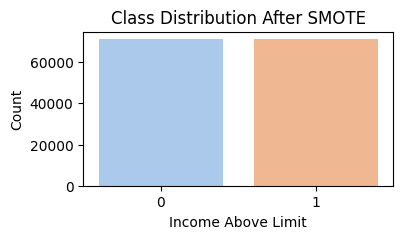

In [108]:
# Visualize the class distribution after oversampling
plt.figure(figsize=(4, 2))
sns.countplot(x=y_resampled, hue=y_resampled, palette='pastel', legend=False)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Income Above Limit')
plt.ylabel('Count')
plt.show()

In [ ]:
# Now that one-hot ending is done, SMOTE applied and data is balanced, so now we will proceed with
# base modeling. I have selected 5 models listed below

In [109]:
df_after_SMOTE = df_encoded.copy(deep=True)

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress the ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Function to optimize the hyperparameters using Optuna
def objective(trial, X, y, model_name):
    params = {}

    if model_name == 'Logistic Regression':
        params['C'] = trial.suggest_float('C', 1e-5, 1e5, log=True)
    elif model_name == 'Random Forest':
        params['n_estimators'] = trial.suggest_int('n_estimators', 10, 200)
        params['max_depth'] = trial.suggest_int('max_depth', 2, 32)
    elif model_name == 'Gradient Boosting':
        params['n_estimators'] = trial.suggest_int('n_estimators', 10, 200)
        params['learning_rate'] = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
        params['max_depth'] = trial.suggest_int('max_depth', 2, 32)
    elif model_name == 'K-Nearest Neighbors':
        params['n_neighbors'] = trial.suggest_int('n_neighbors', 1, 50)

    model = get_model(model_name, params)
    f1 = cross_val_score(model, X, y, scoring='f1', cv=5).mean()

    return f1

# Get the model based on the name and parameters
def get_model(model_name, params):
    if model_name == 'Logistic Regression':
        return LogisticRegression(random_state=42, **params)
    elif model_name == 'Random Forest':
        return RandomForestClassifier(random_state=42, **params)
    elif model_name == 'Gradient Boosting':
        return GradientBoostingClassifier(random_state=42, **params)
    elif model_name == 'K-Nearest Neighbors':
        return KNeighborsClassifier(**params)

# Replace ... with your actual dataset
X, y = your_actual_X_data, your_actual_y_data

# Scaling to standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List of models
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors']

# Optimize hyperparameters for each model
for model_name in models:
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_scaled, y, model_name), n_trials=10)  # Reduce n_trials to 10

    # Get the best parameters and F1 score
    best_params = study.best_params
    best_f1 = study.best_value

    print(f"Optimized parameters for {model_name}: {best_params}")
    print(f"Optimized F1 Score for {model_name}: {best_f1}\n")


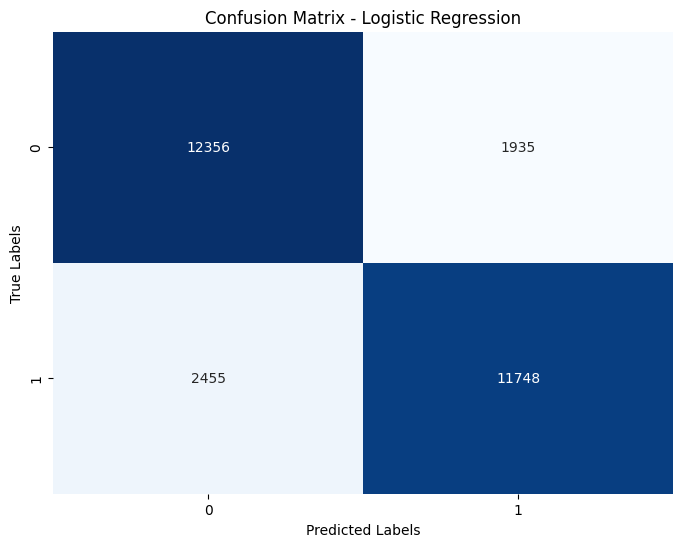

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85     14291
           1       0.86      0.83      0.84     14203

    accuracy                           0.85     28494
   macro avg       0.85      0.85      0.85     28494
weighted avg       0.85      0.85      0.85     28494

Accuracy: 0.8459
Precision: 0.8586
Recall: 0.8271
F1 Score: 0.8426



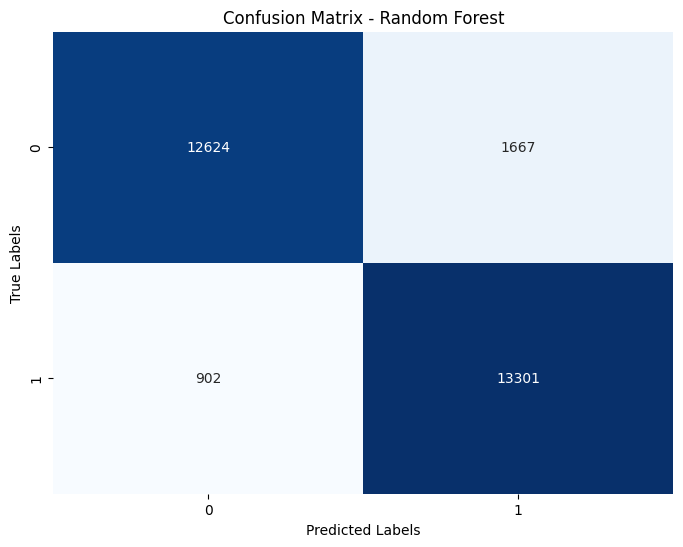

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91     14291
           1       0.89      0.94      0.91     14203

    accuracy                           0.91     28494
   macro avg       0.91      0.91      0.91     28494
weighted avg       0.91      0.91      0.91     28494

Accuracy: 0.9098
Precision: 0.8886
Recall: 0.9365
F1 Score: 0.9119



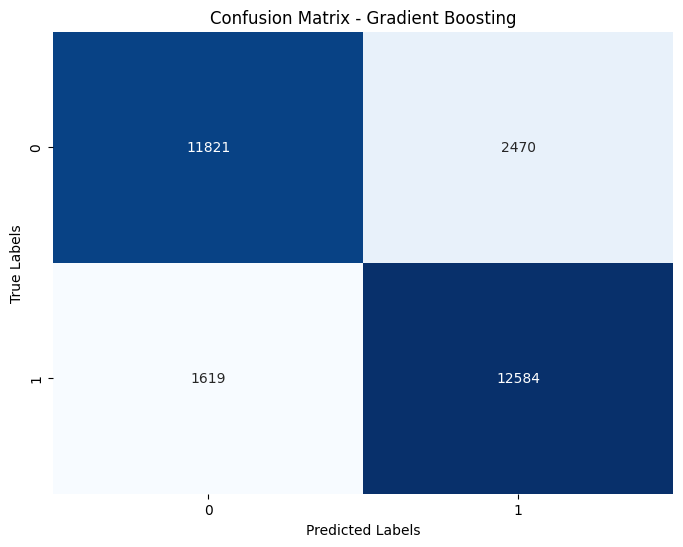

Classification Report - Gradient Boosting:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85     14291
           1       0.84      0.89      0.86     14203

    accuracy                           0.86     28494
   macro avg       0.86      0.86      0.86     28494
weighted avg       0.86      0.86      0.86     28494

Accuracy: 0.8565
Precision: 0.8359
Recall: 0.8860
F1 Score: 0.8602



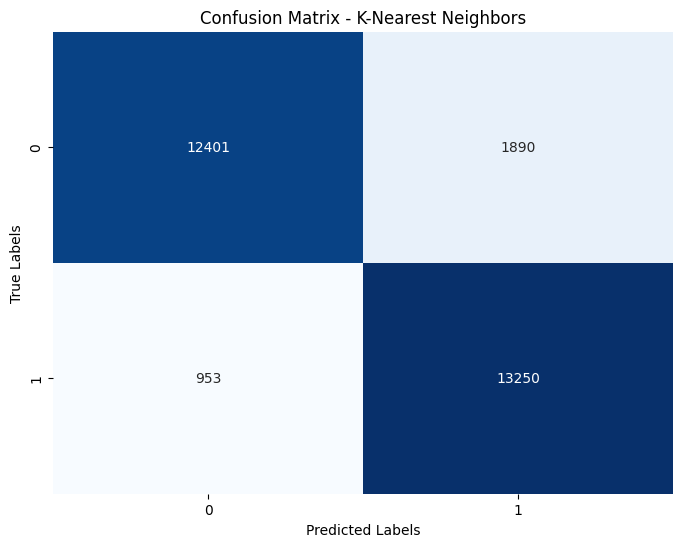

Classification Report - K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90     14291
           1       0.88      0.93      0.90     14203

    accuracy                           0.90     28494
   macro avg       0.90      0.90      0.90     28494
weighted avg       0.90      0.90      0.90     28494

Accuracy: 0.9002
Precision: 0.8752
Recall: 0.9329
F1 Score: 0.9031



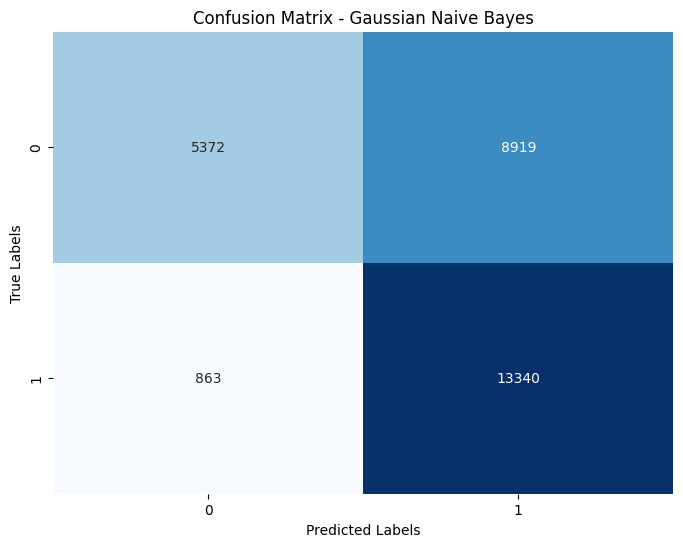

Classification Report - Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       0.86      0.38      0.52     14291
           1       0.60      0.94      0.73     14203

    accuracy                           0.66     28494
   macro avg       0.73      0.66      0.63     28494
weighted avg       0.73      0.66      0.63     28494

Accuracy: 0.6567
Precision: 0.5993
Recall: 0.9392
F1 Score: 0.7317



In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Using scaling to standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of models
# Logistics regression wasnt converging so increased the max_iter
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

# Iterate through each model
for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Display classification report
    print(f"Classification Report - {name}:\n", classification_report(y_test, y_pred))

    # Display evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")


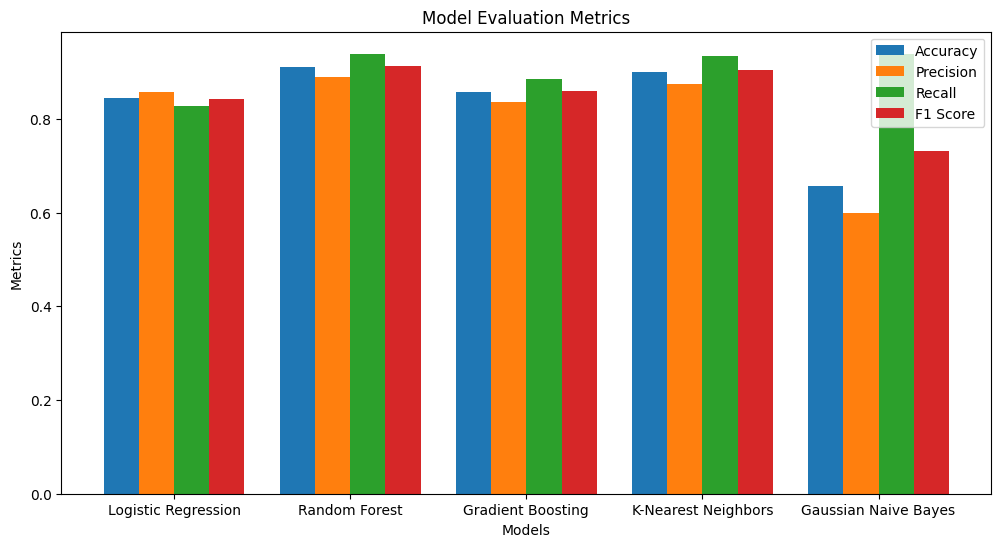

In [111]:
# Comparison of different models, metrics from the classification reports
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors', 'Gaussian Naive Bayes']
accuracy = [0.8459, 0.9106, 0.8571, 0.9008, 0.6569]
precision = [0.8586, 0.8888, 0.8373, 0.8751, 0.5995]
recall = [0.8269, 0.9380, 0.8853, 0.9342, 0.9394]
f1_score = [0.8425, 0.9127, 0.8606, 0.9037, 0.7319]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(models))

bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Metrics')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.show()


In [ ]:
# next step is to do hyperparameter tuning using Optuna,
# Gaussian Naive Bayes is excluded as its has the lowest score

In [ ]:
!pip install optuna

In [115]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import warnings

# Suppress the ConvergenceWarning
warnings.simplefilter("ignore", UserWarning)

# Define objective function for Optuna
def objective(trial, model, X_train, y_train, X_val, y_val):
    params = {}

#    if model == 'Logistic Regression':
#        params['C'] = trial.suggest_float('C', 1e-5, 1e5, log=True, step=1e-2)
#
#        # Create the model with the suggested parameters
#        clf = LogisticRegression(max_iter=1000, **params, random_state=42)

    if model == 'Logistic Regression':
        params['C'] = trial.suggest_float('C', 1e-5, 1e5, log=True)

        # Create the model with the suggested parameters
        clf = LogisticRegression(**params, random_state=42)
    elif model == 'Random Forest':
        params['n_estimators'] = trial.suggest_int('n_estimators', 10, 200)
        params['max_depth'] = trial.suggest_int('max_depth', 1, 32)

        # Create the model with the suggested parameters
        clf = RandomForestClassifier(**params, random_state=42)

    elif model == 'Gradient Boosting':
        params['n_estimators'] = trial.suggest_int('n_estimators', 10, 200)
        params['learning_rate'] = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
        params['max_depth'] = trial.suggest_int('max_depth', 1, 32)

        # Create the model with the suggested parameters
        clf = GradientBoostingClassifier(**params, random_state=42)

    elif model == 'K-Nearest Neighbors':
        params['n_neighbors'] = trial.suggest_int('n_neighbors', 1, 50)

        # Create the model with the suggested parameters
        clf = KNeighborsClassifier(**params)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = clf.predict(X_val)

    # Calculate F1 score for the optimization objective
    return f1_score(y_val, y_pred)

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Optimize hyperparameters for each model
for model_name in models[:-1]:  # Exclude Gaussian Naive Bayes from tuning
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_name, X_train, y_train, X_val, y_val), n_trials=10)  # Reduced n_trials to 10

    # Print the results
    print(f"Optimized parameters for {model_name}: {study.best_params}")
    print(f"Optimized F1 Score for {model_name}: {study.best_value}\n")


[I 2024-02-26 16:51:16,198] A new study created in memory with name: no-name-34ad1190-3b78-4cc7-96cb-aa6d73eff94f
[I 2024-02-26 16:51:17,844] Trial 0 finished with value: 0.8319788993441688 and parameters: {'C': 26074.426146787864}. Best is trial 0 with value: 0.8319788993441688.
[I 2024-02-26 16:51:18,837] Trial 1 finished with value: 0.7862306368330465 and parameters: {'C': 0.0003654259650902251}. Best is trial 0 with value: 0.8319788993441688.
[I 2024-02-26 16:51:19,798] Trial 2 finished with value: 0.8290042529260835 and parameters: {'C': 0.016101037402868112}. Best is trial 0 with value: 0.8319788993441688.
[I 2024-02-26 16:51:20,865] Trial 3 finished with value: 0.8344815277529896 and parameters: {'C': 3518.5295636870933}. Best is trial 3 with value: 0.8344815277529896.
[I 2024-02-26 16:51:21,942] Trial 4 finished with value: 0.7861422963013982 and parameters: {'C': 0.0003596264279469953}. Best is trial 3 with value: 0.8344815277529896.
[I 2024-02-26 16:51:22,962] Trial 5 finishe

Optimized parameters for Logistic Regression: {'C': 5513.408870957158}
Optimized F1 Score for Logistic Regression: 0.8349267049075845



[I 2024-02-26 16:51:30,401] Trial 0 finished with value: 0.8691113580496346 and parameters: {'n_estimators': 54, 'max_depth': 11}. Best is trial 0 with value: 0.8691113580496346.
[I 2024-02-26 16:51:42,408] Trial 1 finished with value: 0.9099728629579377 and parameters: {'n_estimators': 188, 'max_depth': 21}. Best is trial 1 with value: 0.9099728629579377.
[I 2024-02-26 16:51:51,076] Trial 2 finished with value: 0.9125428375599727 and parameters: {'n_estimators': 120, 'max_depth': 32}. Best is trial 2 with value: 0.9125428375599727.
[I 2024-02-26 16:52:04,209] Trial 3 finished with value: 0.9124530876833845 and parameters: {'n_estimators': 181, 'max_depth': 25}. Best is trial 2 with value: 0.9125428375599727.
[I 2024-02-26 16:52:07,578] Trial 4 finished with value: 0.9103864816260053 and parameters: {'n_estimators': 50, 'max_depth': 22}. Best is trial 2 with value: 0.9125428375599727.
[I 2024-02-26 16:52:10,494] Trial 5 finished with value: 0.8223045822102426 and parameters: {'n_estima

Optimized parameters for Random Forest: {'n_estimators': 145, 'max_depth': 29}
Optimized F1 Score for Random Forest: 0.9129051024947811



[I 2024-02-26 16:53:29,496] Trial 0 finished with value: 0.8977810601228642 and parameters: {'n_estimators': 73, 'learning_rate': 0.021105457675071347, 'max_depth': 14}. Best is trial 0 with value: 0.8977810601228642.
[I 2024-02-26 16:56:22,281] Trial 1 finished with value: 0.9056935293123838 and parameters: {'n_estimators': 136, 'learning_rate': 0.024326545460025422, 'max_depth': 20}. Best is trial 1 with value: 0.9056935293123838.
[I 2024-02-26 16:56:38,878] Trial 2 finished with value: 0.8365880805423453 and parameters: {'n_estimators': 89, 'learning_rate': 0.001033549090749139, 'max_depth': 7}. Best is trial 1 with value: 0.9056935293123838.
[I 2024-02-26 16:56:41,051] Trial 3 finished with value: 0.8366851710268259 and parameters: {'n_estimators': 14, 'learning_rate': 0.04098164686737145, 'max_depth': 6}. Best is trial 1 with value: 0.9056935293123838.
[I 2024-02-26 17:01:32,320] Trial 4 finished with value: 0.9042786338042414 and parameters: {'n_estimators': 196, 'learning_rate':

Optimized parameters for Gradient Boosting: {'n_estimators': 136, 'learning_rate': 0.024326545460025422, 'max_depth': 20}
Optimized F1 Score for Gradient Boosting: 0.9056935293123838



[I 2024-02-26 17:13:30,167] Trial 0 finished with value: 0.8319253001333925 and parameters: {'n_neighbors': 38}. Best is trial 0 with value: 0.8319253001333925.
[I 2024-02-26 17:14:33,325] Trial 1 finished with value: 0.8243007823635616 and parameters: {'n_neighbors': 50}. Best is trial 0 with value: 0.8319253001333925.
[I 2024-02-26 17:15:36,078] Trial 2 finished with value: 0.8680319714589552 and parameters: {'n_neighbors': 4}. Best is trial 2 with value: 0.8680319714589552.
[I 2024-02-26 17:16:38,892] Trial 3 finished with value: 0.8676574210492601 and parameters: {'n_neighbors': 9}. Best is trial 2 with value: 0.8680319714589552.
[I 2024-02-26 17:17:41,695] Trial 4 finished with value: 0.8319253001333925 and parameters: {'n_neighbors': 38}. Best is trial 2 with value: 0.8680319714589552.
[I 2024-02-26 17:18:44,760] Trial 5 finished with value: 0.837967341277347 and parameters: {'n_neighbors': 31}. Best is trial 2 with value: 0.8680319714589552.
[I 2024-02-26 17:19:48,099] Trial 6 f

Optimized parameters for K-Nearest Neighbors: {'n_neighbors': 4}
Optimized F1 Score for K-Nearest Neighbors: 0.8680319714589552



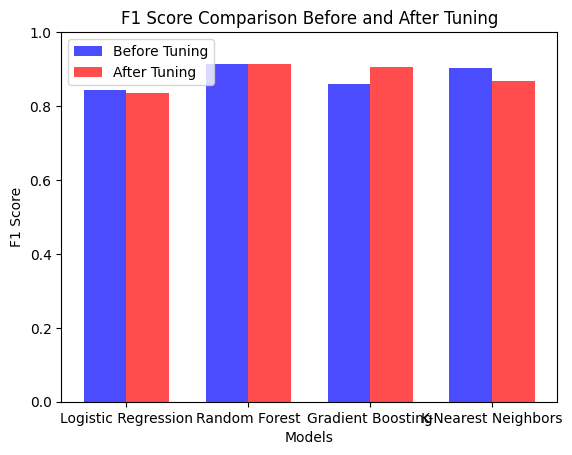

In [120]:
# F1 scores before tuning
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors']
f1_scores_before = [0.8425, 0.9127, 0.8606, 0.9037]

# F1 scores after tuning
f1_scores_after = [0.8349, 0.9129, 0.9057, 0.8680]

# Bar width
bar_width = 0.35
index = np.arange(len(models))

# Create a single side-by-side bar graph
plt.bar(index - bar_width/2, f1_scores_before, width=bar_width, label='Before Tuning', color='blue', alpha=0.7)
plt.bar(index + bar_width/2, f1_scores_after, width=bar_width, label='After Tuning', color='red', alpha=0.7)

# Add labels, title, legend, and show the plot
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison Before and After Tuning')
plt.xticks(index, models)
plt.legend()
plt.ylim([0, 1])
plt.show()


In [121]:
# F1 scores before and after tuning
f1_scores_before = [0.8425, 0.9127, 0.8606, 0.9037]
f1_scores_after = [0.8349, 0.9129, 0.9057, 0.8680]

# Calculate improvement in F1 score
improvement = [after - before for before, after in zip(f1_scores_before, f1_scores_after)]

# Select the model with the highest improvement or highest absolute F1 score after tuning
best_model_index = np.argmax(improvement)
best_model_name = models[best_model_index]
best_model_f1_after_tuning = f1_scores_after[best_model_index]

print(f"The best model after tuning is '{best_model_name}' with F1 score {best_model_f1_after_tuning:.4f}.")


The best model after tuning is 'Gradient Boosting' with F1 score 0.9057.
